In [37]:
!uv pip install seaborn

Audited 1 package in 3ms


In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
df = pd.read_csv('data/titanic3.csv', sep = ';')

Удаляю столбцы, которые не описаны в txt файле(да и в целом не нужны для классификации)

In [40]:
df = df.drop(['home.dest', 'body'], axis=1)

In [41]:
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29,0.0,0.0,24160,"211,3375",B5,S,2
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,"0,9167",1.0,2.0,113781,"151,5500",C22 C26,S,11
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2,1.0,2.0,113781,"151,5500",C22 C26,S,NaN
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30,1.0,2.0,113781,"151,5500",C22 C26,S,NaN
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1.0,2.0,113781,"151,5500",C22 C26,S,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,"14,4542",NaN,C,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,"26,5",0.0,0.0,2656,"7,2250",NaN,C,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27,0.0,0.0,2670,"7,2250",NaN,C,NaN
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29,0.0,0.0,315082,"7,8750",NaN,S,NaN


In [42]:
df.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat'],
      dtype='object')

## Задание 1.
Описание переменных

survival - Выжил ли пассажир - 0 = Нет, 1 = Да.  
pclass	 - Класс билета	     - 1 = 1-й класс, 2 = 2-й класс, 3 = 3-й класс.  
sex	     - Пол пассажира	 - male = мужской, female = женский.  
age	     - Возраст в годах   - Дробное число, если возраст меньше 1 года.  
sibsp	 - Количество братьев/сестер или супругов на борту - Целое число.  
parch	 - Количество родителей/детей на борту	- Целое число.  
ticket	 - Номер билета	     - Уникальный идентификатор.  
fare	 - Стоимость билета	 - Числовое значение.  
cabin	 - Номер каюты	     - Уникальный идентификатор.  
embarked - Порт посадки	     - C = Шербур, Q = Квинстаун, S = Саутгемптон. 
boat     - В какой лодке был

## Задание 2. 
Колонка survived содержит значения 0 и 1  
1 означает, что человек выжил  
0 — не выжил   

Целевая колонка: survived    
Тип задачи: Бинарная классификация (два класса: выжил / не выжил) 

## Задаиние 3.
Удаление дубликатов строк в наборе данных 

In [43]:
df = df.drop_duplicates()

In [44]:
print("Размер после удаления дубликатов:", df.shape)
print("Количество дубликатов:", df.duplicated().sum())

Размер после удаления дубликатов: (1310, 12)
Количество дубликатов: 0


## Задание 4.
Оценить сбалансированность данных по классам (построить гистограмму).

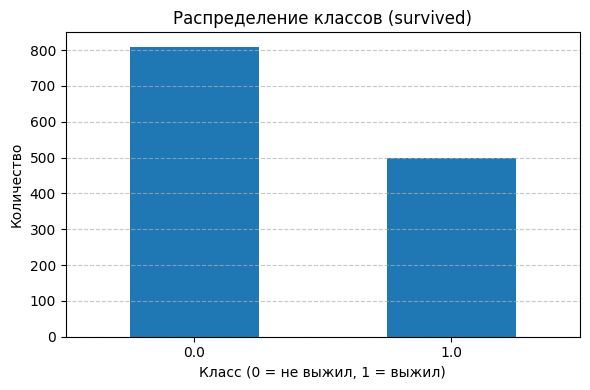

In [45]:
class_counts = df['survived'].value_counts()

plt.figure(figsize=(6, 4))
class_counts.plot(kind='bar')
plt.title('Распределение классов (survived)')
plt.xlabel('Класс (0 = не выжил, 1 = выжил)')
plt.ylabel('Количество')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Из гистограммы:
- Не выжили (класс 0) — 800 человек (~62%)
- Выжили (класс 1) — 500 человек (~38%)  
Вывод: Дисбаланс есть, но не сильный.

## Задание 5. 
Выберите какую кривую использовать для оценки классификатора (ROC или PR)

Буду использовать PR-кривую, так как:
- Она фокусируется на классе 1 (выжившие), который часто важнее.
- Менее чувствительна к дисбалансу, чем ROC.

## Задание 6.
Удалить выбросы из числовых данных. Используйя критерий 1.5-межквантильного интервала.

Сначала разделим данные на числовые и категориальные

In [46]:
numeric_cols = ['age', 'sibsp', 'parch', 'fare']
categorical_cols = ['pclass', 'sex', 'ticket', 'cabin', 'embarked', 'boat', 'name']

In [47]:
print(df[numeric_cols].dtypes)

age       object
sibsp    float64
parch    float64
fare      object
dtype: object


Приведем object к float64

In [48]:
for col in numeric_cols:
    df[col] = pd.to_numeric(
        df[col].astype(str).str.replace(',', '.', regex=False),
        errors='coerce'
    )

In [49]:
print(df[numeric_cols].dtypes)

age      float64
sibsp    float64
parch    float64
fare     float64
dtype: object


Перейдем к удалению выбросов.

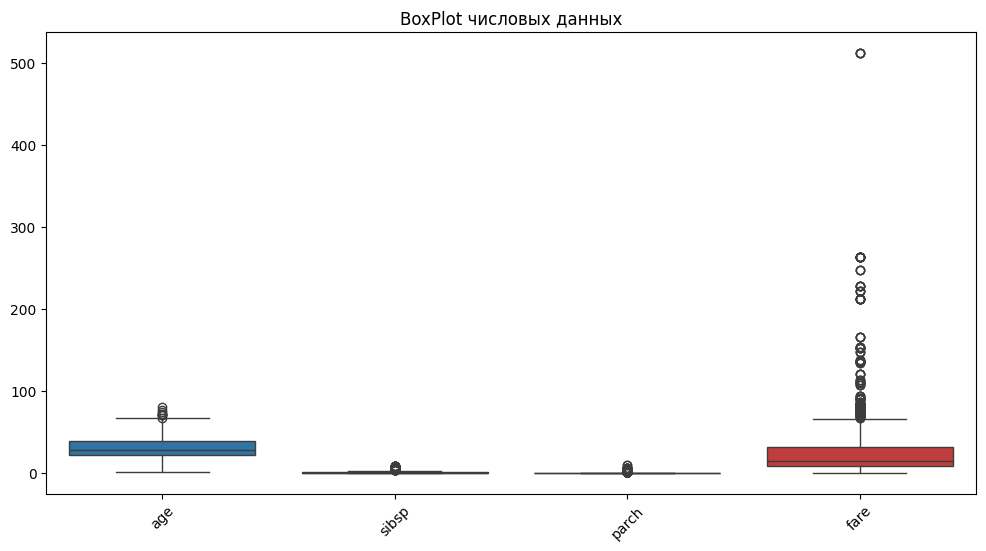

In [50]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numeric_cols])
plt.title("BoxPlot числовых данных")
plt.xticks(rotation=45)
plt.show()

На boxplot видим явный выброс только у 'fare'

In [51]:
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 3 * IQR
        upper = Q3 + 3 * IQR
        df = df[(df[col] >= lower) & (df[col] <= upper)]
    return df
    
remove_col = ['fare']
df_clean = remove_outliers(df, remove_col)

In [52]:
print(f"Размер до удаления выбросов: {df.shape}")
print(f"Размер после удаления выбросов: {df_clean.shape}")

Размер до удаления выбросов: (1310, 12)
Размер после удаления выбросов: (1224, 12)


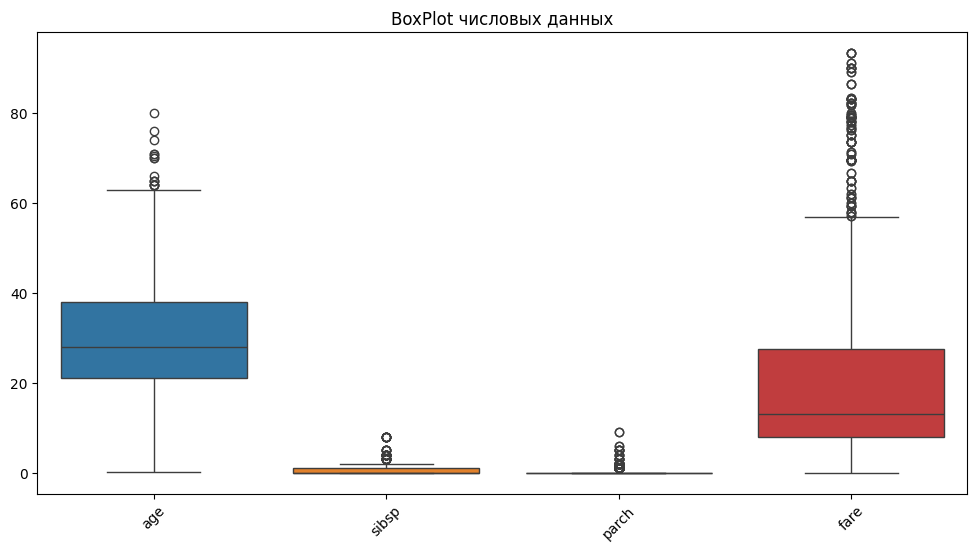

In [53]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_clean[numeric_cols])
plt.title("BoxPlot числовых данных")
plt.xticks(rotation=45)
plt.show()

## Задание 7.  
Заполните пропущенные значения в данных

In [54]:
!uv pip install scikit-learn

Audited 1 package in 4ms


In [55]:
from sklearn.impute import SimpleImputer

In [56]:
print(df_clean.isnull().sum())

pclass        0
survived      0
name          0
sex           0
age         258
sibsp         0
parch         0
ticket        0
fare          0
cabin       999
embarked      2
boat        797
dtype: int64


Стратегия заполнения пропусков:
- age(заполним медианой)
- cabin(заполним спец. значением 'Unknown')

По поводу boat принимаю волевое решение удалить.  
Если человек был в лодке -> он выжил.  
С другой стороны если он выжил -> он был в лодке.  
Это подтверждает подсчет корреляции

In [57]:
df_clean = df_clean.copy()
df_clean['boat_binary'] = df_clean['boat'].notna().astype(int)

In [58]:
print(df_clean[['boat', 'boat_binary', 'survived']].head())

  boat  boat_binary  survived
5    3            1       1.0
6   10            1       1.0
7  NaN            0       0.0
8    D            1       1.0
9  NaN            0       0.0


In [59]:
from scipy.stats import pointbiserialr

In [60]:
corr, p_value = pointbiserialr(df_clean['boat_binary'], df_clean['survived'])

In [61]:
print(f"Корреляция между наличием шлюпки и выживаемостью: {corr:.3f}")
print(f"P-value: {p_value:.5f}")

Корреляция между наличием шлюпки и выживаемостью: 0.945
P-value: 0.00000


In [62]:
df_clean.drop(['boat', 'boat_binary'], axis=1, inplace=True)

In [63]:
num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

In [64]:
df_clean['age'] = num_imputer.fit_transform(df_clean[['age']])
df_clean['embarked'] = cat_imputer.fit_transform(df_clean[['embarked']]).ravel()

In [65]:
df_clean['cabin'] = df_clean['cabin'].fillna('Unknown')

In [66]:
print(df_clean.isnull().sum())

pclass      0
survived    0
name        0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        0
cabin       0
embarked    0
dtype: int64


## Задание 8.  
Выполните масштабирование количественных (числовых) признаков: 

In [67]:
numeric_cols = ['age', 'sibsp', 'parch', 'fare']

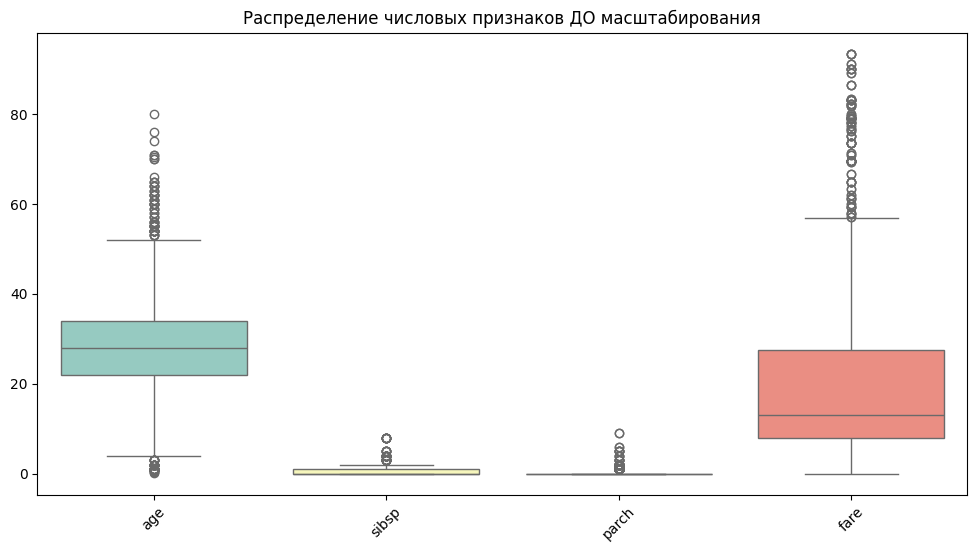

In [68]:
#BoxPlot до масштабирования
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_clean[numeric_cols], palette="Set3")
plt.title("Распределение числовых признаков ДО масштабирования")
plt.xticks(rotation=45)
plt.show()

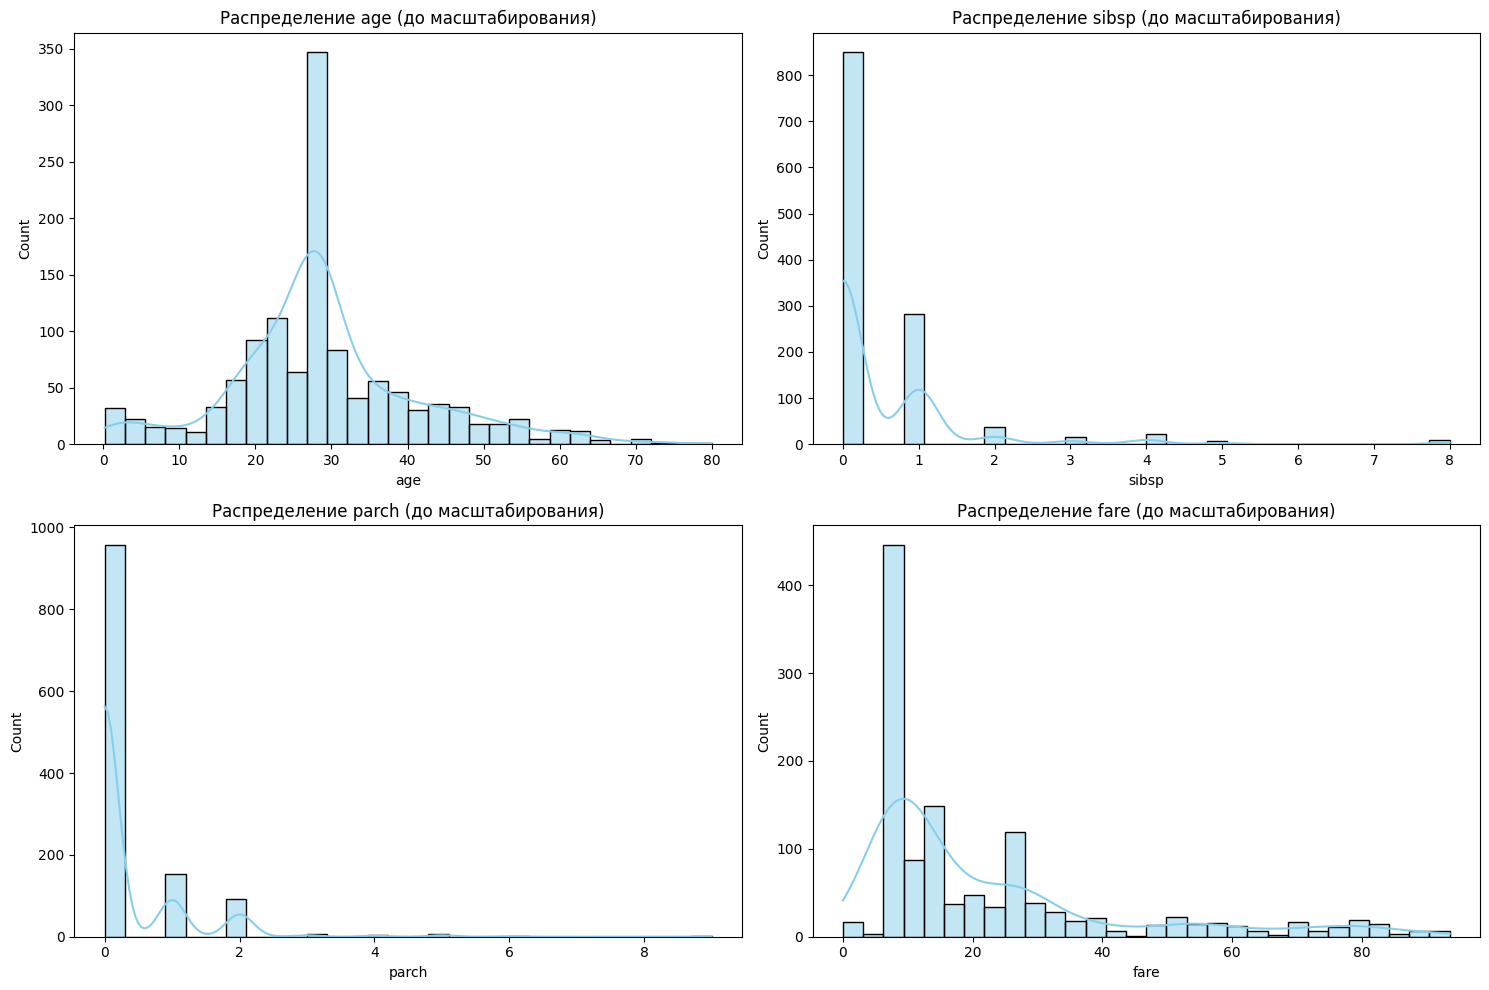

In [69]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df_clean[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Распределение {col} (до масштабирования)')
    plt.xlabel(col)
plt.tight_layout()
plt.show()

In [70]:
from sklearn.preprocessing import StandardScaler

In [71]:
scaler = StandardScaler()
df_scaled = df_clean.copy()
df_scaled[numeric_cols] = scaler.fit_transform(df_clean[numeric_cols])

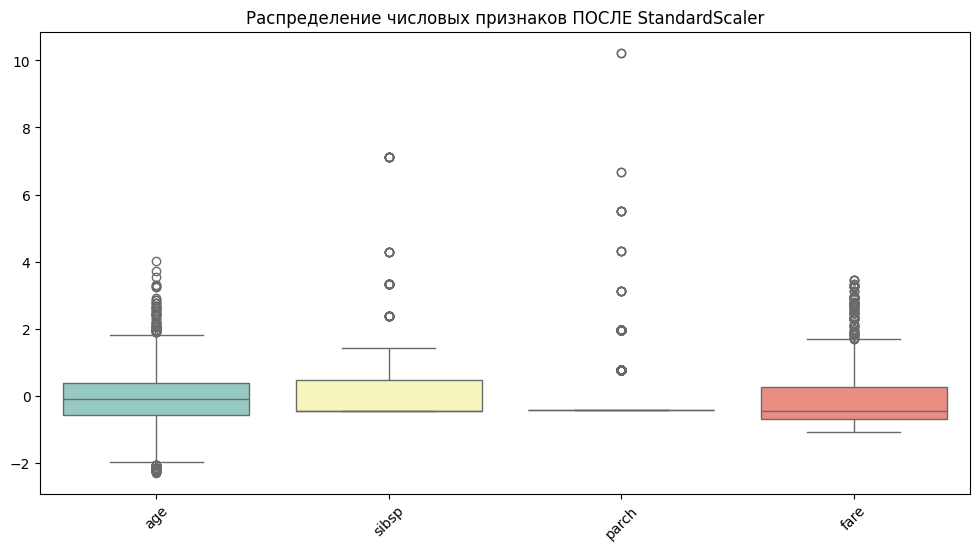

In [72]:
#после
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_scaled[numeric_cols], palette="Set3")
plt.title("Распределение числовых признаков ПОСЛЕ StandardScaler")
plt.xticks(rotation=45)
plt.show()

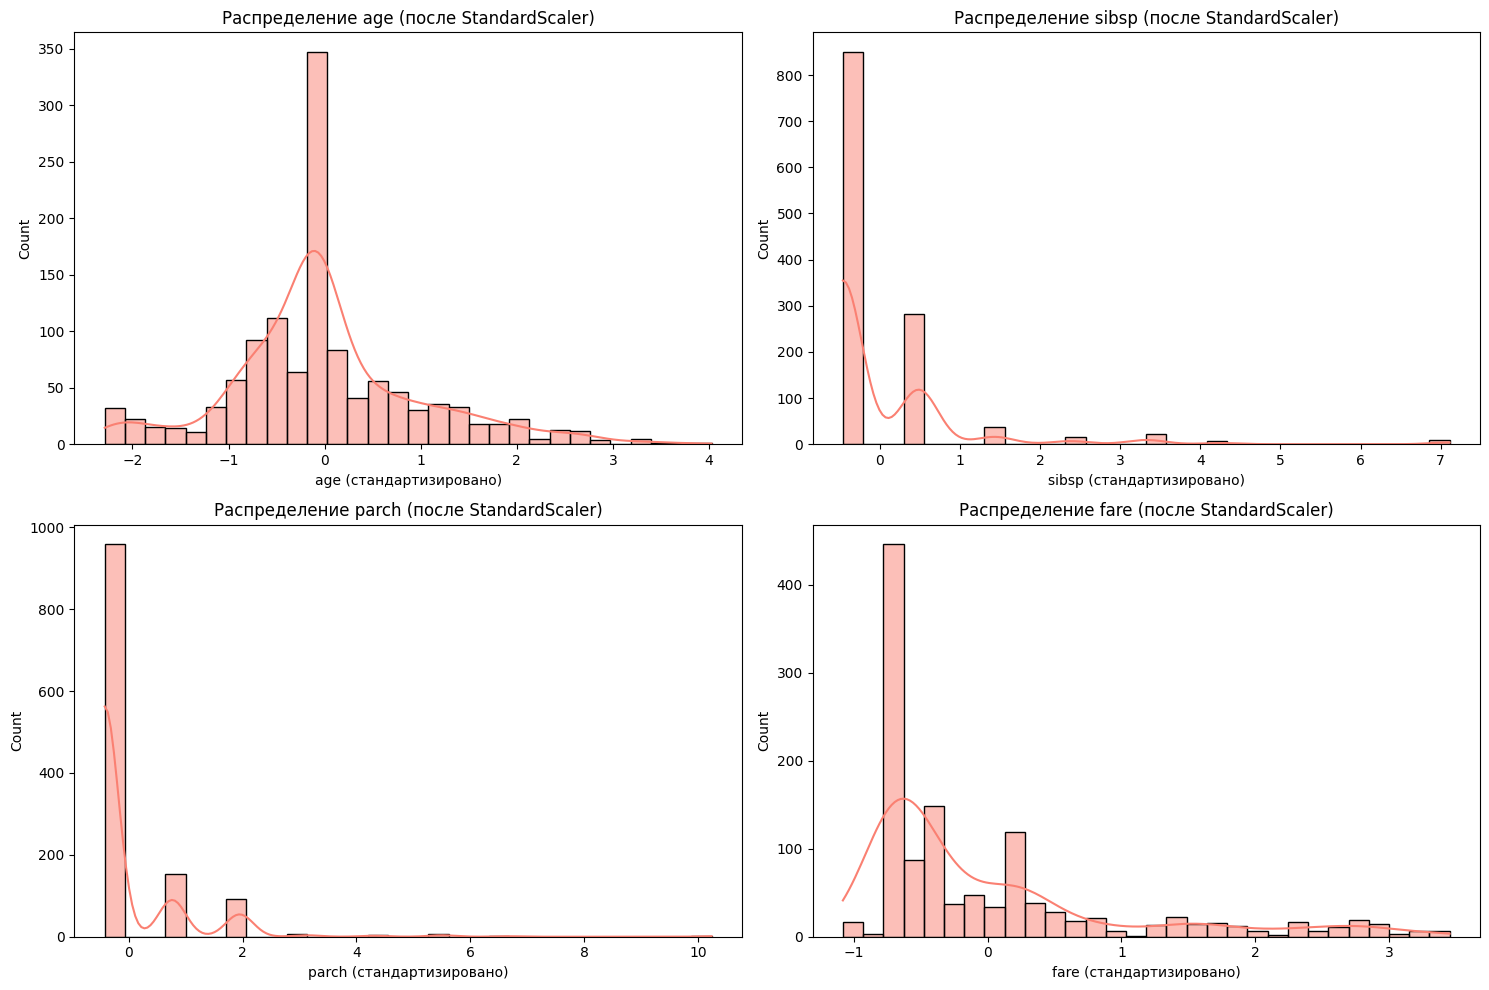

In [73]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df_scaled[col], kde=True, bins=30, color='salmon')
    plt.title(f'Распределение {col} (после StandardScaler)')
    plt.xlabel(f"{col} (стандартизировано)")
plt.tight_layout()
plt.show()

## Задание 9.
Выполните замену категориальных признаков; выберите и обоснуйте способ замены; (label encoder и one hot encoder)

In [74]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [75]:
categorical_cols = ['pclass', 'sex', 'embarked', 'cabin', 'name', 'ticket']

- Бинарные: sex (male/female)
- Порядковые: pclass (1, 2, 3 — имеет вложенную иерархию)
- Номинальные (без порядка): embarked (S, C, Q), cabin (много уникальных значений)
- Высококардинальные: name, ticket (почти уникальные значения)

Выбор методов кодирования
- sex - LabelEncoder(Всего 2 категории — преобразуем в 0/1)
- pclass - Сохраняет порядок классов (1 < 2 < 3)
- embarked - OneHotEncoder(Нет порядка (S, C, Q))
- name - удалить
- cabin - удалить
- ticket - удалить

In [76]:
df_scaled.drop(['name', 'ticket', 'cabin'], axis=1, inplace=True)

In [77]:
df_scaled

,pclass,survived,sex,age,sibsp,parch,fare,embarked
5,1.0,1.0,male,1.495605,-0.461729,-0.418683,0.206461,S
6,1.0,1.0,female,2.682303,0.484932,-0.418683,2.697725,S
7,1.0,0.0,male,0.783586,-0.461729,-0.418683,-1.080161,S
8,1.0,1.0,female,1.891171,1.431593,-0.418683,1.414539,S
9,1.0,0.0,male,3.315209,-0.461729,-0.418683,1.318830,C
...,...,...,...,...,...,...,...,...
1304,3.0,0.0,female,-1.154688,0.484932,-0.418683,-0.379705,C
1305,3.0,0.0,female,-0.086659,0.484932,-0.418683,-0.379705,C
1306,3.0,0.0,male,-0.205329,-0.461729,-0.418683,-0.730035,C
1307,3.0,0.0,male,-0.165773,-0.461729,-0.418683,-0.730035,C


In [78]:
le = LabelEncoder()
df_scaled['sex_encoded'] = le.fit_transform(df_clean['sex'])  # female=0, male=1
df_scaled.drop('sex', axis=1, inplace=True)

In [79]:
ohe = OneHotEncoder(sparse_output=False, drop='first')
embarked_encoded = ohe.fit_transform(df_scaled[['embarked']])
df_scaled[['embarked_C', 'embarked_Q']] = embarked_encoded  # S — базовая категория
df_scaled.drop('embarked', axis=1, inplace=True)

In [80]:
print(df_scaled.head())

   pclass  survived       age     sibsp     parch      fare  sex_encoded  \
5     1.0       1.0  1.495605 -0.461729 -0.418683  0.206461            1   
6     1.0       1.0  2.682303  0.484932 -0.418683  2.697725            0   
7     1.0       0.0  0.783586 -0.461729 -0.418683 -1.080161            1   
8     1.0       1.0  1.891171  1.431593 -0.418683  1.414539            0   
9     1.0       0.0  3.315209 -0.461729 -0.418683  1.318830            1   

   embarked_C  embarked_Q  
5         0.0         1.0  
6         0.0         1.0  
7         0.0         1.0  
8         0.0         1.0  
9         0.0         0.0  


## Задание 10.
Оцените корреляцию между признаками

In [81]:
corr_matrix = df_scaled.corr(numeric_only=True)

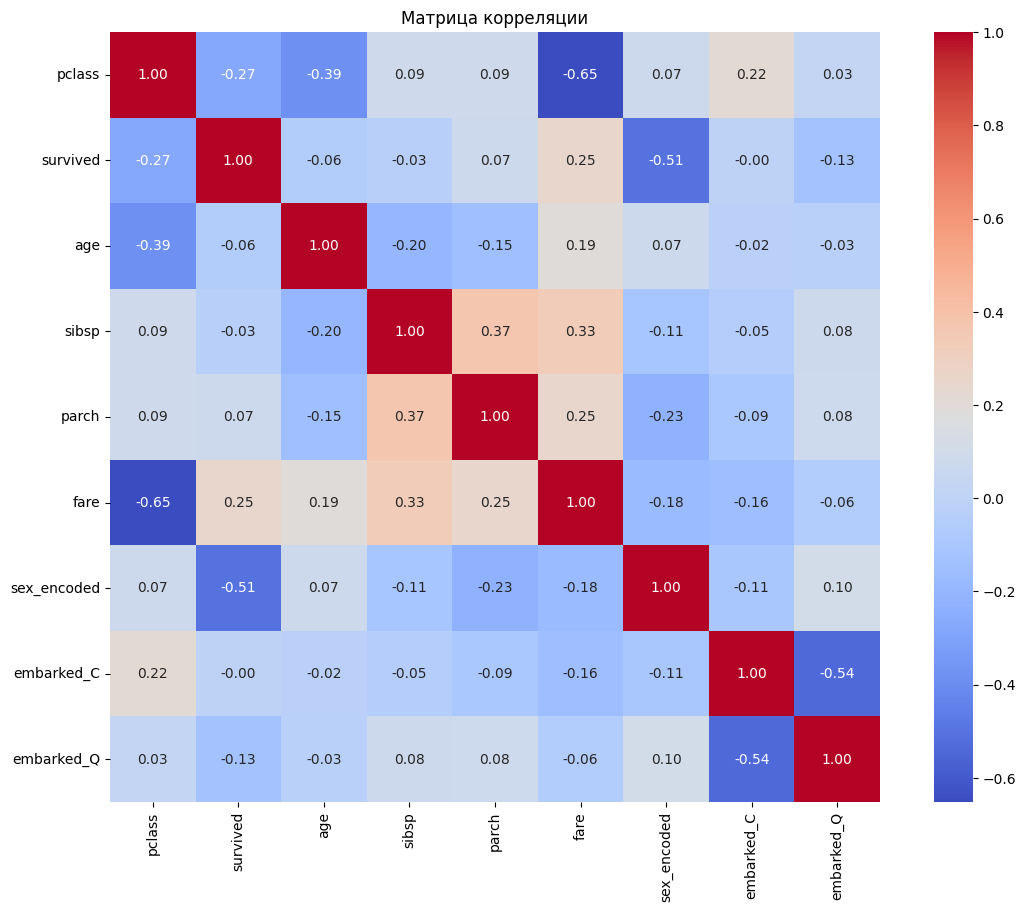

In [82]:
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Матрица корреляции')
plt.show()

## Классификация

Подготовка данных

In [86]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.metrics import (average_precision_score, precision_recall_curve, auc, 
                            accuracy_score, classification_report)
import matplotlib.pyplot as plt

## KNN

Лучшие параметры: {'outlier_label': 'most_frequent', 'radius': np.float64(1.5), 'weights': 'uniform'}
Лучший Average Precision: 0.703


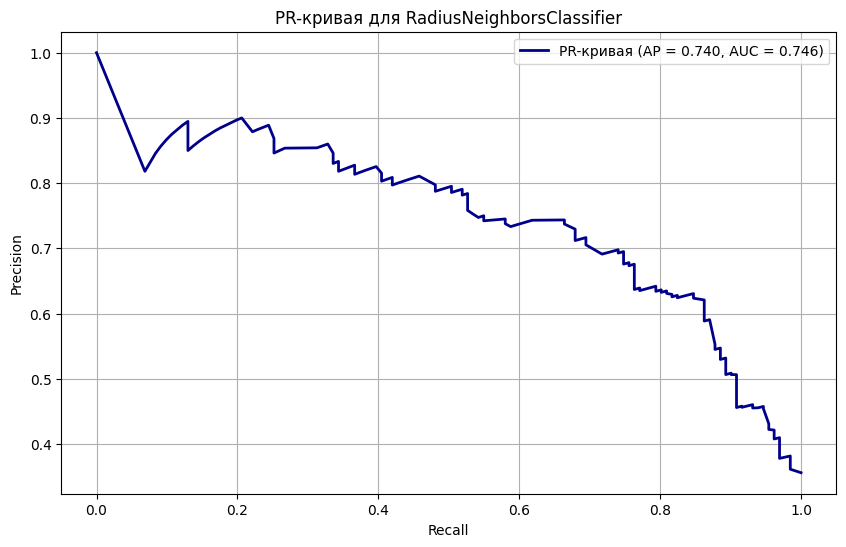

In [87]:
X = df_scaled.drop('survived', axis=1)
y = df_scaled['survived']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

param_grid = {
    'radius': np.linspace(0.5, 5.0, 10),
    'weights': ['uniform', 'distance'],
    'outlier_label': ['most_frequent']
}

grid = GridSearchCV(
    RadiusNeighborsClassifier(),
    param_grid,
    cv=5,
    scoring='average_precision',  # PR-AUC
    n_jobs=-1
)

grid.fit(X_train, y_train)

best_model = grid.best_estimator_
print(f"Лучшие параметры: {grid.best_params_}")
print(f"Лучший Average Precision: {grid.best_score_:.3f}")

y_proba = best_model.predict_proba(X_test)[:, 1]

# Рассчитываем метрики для PR-кривой
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
pr_auc = auc(recall, precision)
average_precision = average_precision_score(y_test, y_proba)

# Строим PR-кривую
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, color='darkblue', lw=2, 
         label=f'PR-кривая (AP = {average_precision:.3f}, AUC = {pr_auc:.3f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR-кривая для RadiusNeighborsClassifier')
plt.legend(loc="upper right")
plt.grid()
plt.show()

Average Precision (AP, "усреднённая точность") — это метрика, которая оценивает качество бинарной классификации, особенно когда классы несбалансированы. 

## Персептрон

In [91]:
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (accuracy_score, 
                            average_precision_score,
                            precision_recall_curve,
                            auc)
import matplotlib.pyplot as plt


--- Без регуляризации ---
Лучшая конфигурация: {'eta0': 0.1, 'max_iter': 500, 'penalty': None, 'tol': 0.001}
Accuracy: 0.796
Average Precision (AP): 0.790

--- С L1-регуляризацией ---
Лучшая конфигурация: {'alpha': 0.0001, 'eta0': 0.5, 'max_iter': 500, 'penalty': 'l1', 'tol': 0.001}
Accuracy: 0.783
Average Precision (AP): 0.800

--- С L2-регуляризацией ---
Лучшая конфигурация: {'alpha': 0.001, 'eta0': 0.5, 'max_iter': 500, 'penalty': 'l2', 'tol': 0.001}
Accuracy: 0.772
Average Precision (AP): 0.770


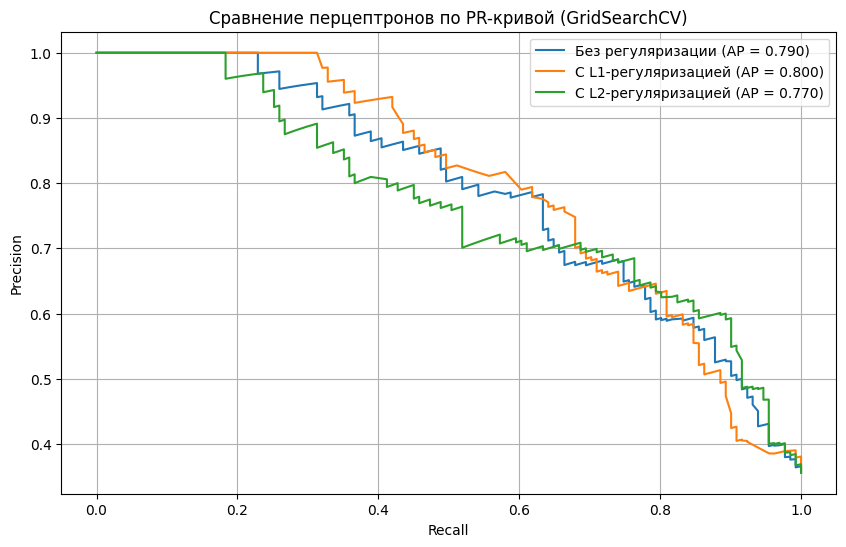

In [92]:
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (accuracy_score, 
                            average_precision_score,
                            precision_recall_curve,
                            auc)
import matplotlib.pyplot as plt

# Разделение признаков и целевой переменной
X = df_scaled.drop('survived', axis=1)
y = df_scaled['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Конфигурации моделей с соответствующей сеткой параметров
param_grids = {
    "Без регуляризации": {
        'penalty': [None],
        'max_iter': [500, 1000, 1500],
        'eta0': [1.0, 0.5, 0.1],
        'tol': [1e-3, 1e-4]
    },
    "С L1-регуляризацией": {
        'penalty': ['l1'],
        'alpha': [0.0001, 0.001, 0.01],
        'max_iter': [500, 1000],
        'eta0': [1.0, 0.5],
        'tol': [1e-3]
    },
    "С L2-регуляризацией": {
        'penalty': ['l2'],
        'alpha': [0.0001, 0.001, 0.01],
        'max_iter': [500, 1000],
        'eta0': [1.0, 0.5],
        'tol': [1e-3]
    }
}

plt.figure(figsize=(10, 6))

# Перебор конфигураций
for name, param_grid in param_grids.items():
    base_model = Perceptron(random_state=42)
    grid_search = GridSearchCV(base_model, param_grid, cv=5, scoring='average_precision', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    y_score = best_model.decision_function(X_test)

    ap_score = average_precision_score(y_test, y_score)
    precision, recall, _ = precision_recall_curve(y_test, y_score)

    print(f"\n--- {name} ---")
    print(f"Лучшая конфигурация: {grid_search.best_params_}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
    print(f"Average Precision (AP): {ap_score:.3f}")

    plt.plot(recall, precision, label=f'{name} (AP = {ap_score:.3f})')

# Настройка графика
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Сравнение перцептронов по PR-кривой (GridSearchCV)')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


1. Accuracy (Точность)
Показывает долю правильно классифицированных примеров:

Наивысшая точность — у модели без регуляризации (0.796).
Это означает, что модель хорошо справляется в среднем с задачей "кто выжил, кто нет"

2. AP (Average Precision / Средняя точность по PR-кривой)
Это более чувствительная метрика в условиях дисбаланса классов (а он есть в Титанике — погибших больше):

Наивысший AP — у модели с L1-регуляризацией (0.800), даже несмотря на чуть меньшую общую точность.
Это говорит о лучшем качестве ранжирования положительного класса (выживших) — то есть, модель с L1 эффективнее отделяет выживших от погибших.